In [190]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [191]:
data=pd.read_csv("train_values.csv")

In [192]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [193]:
data.columns=["patient_id","slope","thal","rbs","cp","ves","fbs","rese","chol","op","sex","age","max","ang"]

In [194]:
data.head()

,patient_id,slope,thal,rbs,cp,ves,fbs,rese,chol,op,sex,age,max,ang
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [195]:
data["thal"].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [196]:
data['thal']=data['thal'].map({'normal':0,'reversible_defect':1,'fixed_defect':2})

In [197]:
data.head()

,patient_id,slope,thal,rbs,cp,ves,fbs,rese,chol,op,sex,age,max,ang
0,0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0


In [199]:
data=data[data['chol']!=564]

In [200]:
pid=pd.read_csv("train_labels.csv")

In [201]:
pid.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [202]:
data["hp"]=pid["heart_disease_present"]

In [203]:
data.head()

,patient_id,slope,thal,rbs,cp,ves,fbs,rese,chol,op,sex,age,max,ang,hp
0,0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


In [204]:
test=pd.read_csv("test_values.csv")

In [205]:
test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [206]:
test.columns=["patient_id","slope","thal","rbs","cp","ves","fbs","rese","chol","op","sex","age","max","ang"]

In [207]:
test1=test["patient_id"]

In [208]:
x=test.iloc[:,0:1]

In [209]:
test=test.drop("patient_id",axis=1)

In [210]:
test.head()

,slope,thal,rbs,cp,ves,fbs,rese,chol,op,sex,age,max,ang
0,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [211]:
test['thal']=test['thal'].map({'normal':0,'reversible_defect':1,'fixed_defect':2})

In [212]:
data = pd.get_dummies(data, columns = ['cp','thal','rese','slope','ves'])

In [213]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'rbs', 'chol', 'max', 'op']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [214]:
data.head()

,patient_id,rbs,fbs,chol,op,sex,age,max,ang,hp,...,rese_0,rese_1,rese_2,slope_1,slope_2,slope_3,ves_0,ves_1,ves_2,ves_3
0,0z64un,-0.200527,0,1.284325,-0.898454,1,-1.048773,0.933150,0,0,...,0,0,1,1,0,0,1,0,0,0
1,ryoo3j,-1.261444,0,-0.709590,0.529500,0,-0.079981,0.388918,0,0,...,1,0,0,0,1,0,1,0,0,0
2,yt1s1x,-0.377347,0,1.199477,-0.898454,1,2.395820,0.570329,1,1,...,0,0,1,1,0,0,0,0,0,1
3,l2xjde,1.214029,0,-0.518683,-0.898454,1,-1.586990,1.432029,0,1,...,1,0,0,1,0,0,1,0,0,0
4,oyt4ek,2.746465,0,0.478274,2.849924,1,0.458237,-0.200666,0,0,...,0,0,1,0,0,1,1,0,0,0


In [215]:
data.shape

(179, 27)

In [216]:
test.shape

(90, 13)

In [217]:
data=data.drop("patient_id",axis=1)

In [218]:
from sklearn.model_selection import train_test_split

In [345]:
y = data['hp']
X = data.drop(['hp'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=6)

In [270]:
X_train.shape

(134, 25)

In [272]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

In [273]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_train, y_train))

Text(0.5,1,'Support Vector Classifier scores for different kernels')

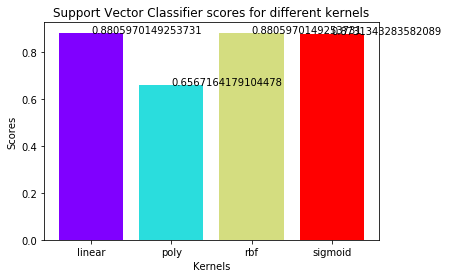

In [274]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [275]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[2]*100, 'rbf'))

The score for Support Vector Classifier is 88.05970149253731% with rbf kernel.


In [276]:
from sklearn.grid_search import GridSearchCV
parameters = {'kernel':('linear','sigmoid', 'rbf'), 'C':[0.01,0.1,1,10], 'gamma':[0.01,0.1,1,10,100]}
#svr = svm.SVC()
grid = GridSearchCV(estimator=svc_classifier, param_grid=parameters,n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [277]:
sv=SVC(kernel='rbf',gamma=0.01,C=1,probability=True)


In [278]:
sv.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [279]:
print(sv.score(X_train,y_train))

0.8731343283582089


In [280]:
print(sv.score(X_test,y_test))

0.8444444444444444


In [281]:
from sklearn.metrics import log_loss
clf_probs = sv.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.44260766245980193


In [292]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

In [293]:
xgb_clf = XGBClassifier(max_depth=5)
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [294]:
print(xgb_clf.feature_importances_)

[0.11627907 0.00258398 0.10335917 0.1498708  0.04780362 0.11757106
 0.11886305 0.01937984 0.         0.00129199 0.00904393 0.07105943
 0.01937984 0.04392765 0.         0.04651163 0.         0.
 0.00775194 0.03875969 0.         0.07622739 0.00775194 0.
 0.00258398]


In [295]:
print(xgb_clf.score(X_test,y_test))

0.8222222222222222


In [296]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
        'silent': [False],
        'max_depth': [4,5],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

fit_params = {'eval_metric': 'logloss',
              'early_stopping_rounds': 10,
              'eval_set': [(X_train, y_train)]}

clf = xgb.XGBClassifier()


In [297]:
rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=-1, verbose=2, cv=2,
                            fit_params=fit_params,
                            scoring='neg_log_loss', refit=False, random_state=42)

In [298]:
rs_clf.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.2s finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params={'eval_metric': 'logloss', 'early_stopping_rounds': 10, 'eval_set': [(          rbs  fbs      chol        op  sex       age       max  ang  cp_1  \
5   -0.082647    0 -1.430793 -0.898454    1 -1.371703  0.026097    0     0
102 -1.261444    0 -0.179294  0.172511    1  0.458237 -0.336724...38    0
50     1
88     0
105    0
130    0
175    1
123    0
Name: hp, Length: 134, dtype: int64)]},
          iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'silent': [False], 'max_depth': [4, 5], 'learning_rate': [0.

In [299]:
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: -0.4616463448463091
Best params: 
colsample_bylevel: 0.9
colsample_bytree: 0.5
gamma: 0
learning_rate: 0.2
max_depth: 5
min_child_weight: 5.0
n_estimators: 100
reg_lambda: 0.1
silent: False
subsample: 0.8


In [300]:
clf=xgb.XGBClassifier(gamma=0.25,learning_rate=0.2,max_depth=4,n_estimators=100,reg_lambda=0.1,silent=False,subsample=0.8,
                      colsample_bylevel=0.9,colsample_bytree=0.3,min_child_weight=5) 
clf.fit(X_train,y_train)

[10:04:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[10:04:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:04:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:04:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:04:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[10:04:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[10:04:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
       colsample_bytree=0.3, gamma=0.25, learning_rate=0.2,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=0.1, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.8)

In [301]:
print(clf.score(X_test,y_test))

0.8


In [302]:
from sklearn.metrics import log_loss
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.4554101571233736


In [282]:
test = pd.get_dummies(test, columns = ['cp','thal','rese','slope','ves'])

In [346]:
import lightgbm as lgb

In [444]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l2', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 150, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid,n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_params_)

#gridsearch.fit(X_train, y_train,
 #       'eval_set' : [(X_test, y_test)],
  #      'eval_metric' = ['auc', 'binary_logloss'],
   #     'early_stopping_rounds' = 5)


{'learning_rate': 0.15, 'n_estimators': 120}


In [445]:
estimator = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', 
                        n_estimators = 120, num_leaves = 38)
estimator.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.15, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=120, n_jobs=-1, num_leaves=38,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [446]:
print(estimator.score(X_test,y_test))

0.8666666666666667


In [447]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
abc.fit(X_train,y_train)



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=50, random_state=None)

In [360]:
print(abc.score(X_test,y_test))

0.8222222222222222


In [361]:
from sklearn.metrics import log_loss
clf_probs = abc.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.6498447864541865


In [364]:
from catboost import CatBoostClassifier

cat_clf=CatBoostClassifier(max_depth=5,learning_rate=0.01)
cat_clf.fit(X_train,y_train)

0:	learn: 0.6869984	total: 353ms	remaining: 5m 52s
1:	learn: 0.6791924	total: 393ms	remaining: 3m 16s
2:	learn: 0.6732248	total: 416ms	remaining: 2m 18s
3:	learn: 0.6669633	total: 437ms	remaining: 1m 48s
4:	learn: 0.6622766	total: 459ms	remaining: 1m 31s
5:	learn: 0.6570579	total: 479ms	remaining: 1m 19s
6:	learn: 0.6517680	total: 504ms	remaining: 1m 11s
7:	learn: 0.6453907	total: 526ms	remaining: 1m 5s
8:	learn: 0.6398198	total: 551ms	remaining: 1m
9:	learn: 0.6345281	total: 584ms	remaining: 57.8s
10:	learn: 0.6294434	total: 628ms	remaining: 56.5s
11:	learn: 0.6256616	total: 645ms	remaining: 53.1s
12:	learn: 0.6216679	total: 670ms	remaining: 50.9s
13:	learn: 0.6156964	total: 695ms	remaining: 49s
14:	learn: 0.6096543	total: 717ms	remaining: 47.1s
15:	learn: 0.6064027	total: 741ms	remaining: 45.6s
16:	learn: 0.6021802	total: 759ms	remaining: 43.9s
17:	learn: 0.5981158	total: 780ms	remaining: 42.6s
18:	learn: 0.5936066	total: 799ms	remaining: 41.3s
19:	learn: 0.5906468	total: 817ms	remai

169:	learn: 0.3180995	total: 4.03s	remaining: 19.7s
170:	learn: 0.3173949	total: 4.05s	remaining: 19.7s
171:	learn: 0.3166016	total: 4.08s	remaining: 19.6s
172:	learn: 0.3152986	total: 4.11s	remaining: 19.6s
173:	learn: 0.3149663	total: 4.12s	remaining: 19.6s
174:	learn: 0.3146911	total: 4.14s	remaining: 19.5s
175:	learn: 0.3141181	total: 4.16s	remaining: 19.5s
176:	learn: 0.3123703	total: 4.19s	remaining: 19.5s
177:	learn: 0.3118352	total: 4.21s	remaining: 19.4s
178:	learn: 0.3113735	total: 4.23s	remaining: 19.4s
179:	learn: 0.3108557	total: 4.26s	remaining: 19.4s
180:	learn: 0.3102031	total: 4.29s	remaining: 19.4s
181:	learn: 0.3095603	total: 4.31s	remaining: 19.4s
182:	learn: 0.3082600	total: 4.34s	remaining: 19.4s
183:	learn: 0.3072508	total: 4.37s	remaining: 19.4s
184:	learn: 0.3070809	total: 4.38s	remaining: 19.3s
185:	learn: 0.3062630	total: 4.41s	remaining: 19.3s
186:	learn: 0.3058686	total: 4.43s	remaining: 19.2s
187:	learn: 0.3046524	total: 4.45s	remaining: 19.2s
188:	learn: 

329:	learn: 0.2261558	total: 7.62s	remaining: 15.5s
330:	learn: 0.2252821	total: 7.64s	remaining: 15.5s
331:	learn: 0.2247936	total: 7.67s	remaining: 15.4s
332:	learn: 0.2246106	total: 7.69s	remaining: 15.4s
333:	learn: 0.2242055	total: 7.71s	remaining: 15.4s
334:	learn: 0.2235931	total: 7.74s	remaining: 15.4s
335:	learn: 0.2231643	total: 7.76s	remaining: 15.3s
336:	learn: 0.2228751	total: 7.78s	remaining: 15.3s
337:	learn: 0.2223475	total: 7.8s	remaining: 15.3s
338:	learn: 0.2220515	total: 7.83s	remaining: 15.3s
339:	learn: 0.2218465	total: 7.85s	remaining: 15.2s
340:	learn: 0.2212974	total: 7.88s	remaining: 15.2s
341:	learn: 0.2207414	total: 7.9s	remaining: 15.2s
342:	learn: 0.2204977	total: 7.92s	remaining: 15.2s
343:	learn: 0.2198978	total: 7.94s	remaining: 15.1s
344:	learn: 0.2194651	total: 7.96s	remaining: 15.1s
345:	learn: 0.2190415	total: 7.99s	remaining: 15.1s
346:	learn: 0.2189148	total: 8.01s	remaining: 15.1s
347:	learn: 0.2182971	total: 8.03s	remaining: 15s
348:	learn: 0.21

493:	learn: 0.1718864	total: 11.2s	remaining: 11.5s
494:	learn: 0.1717595	total: 11.2s	remaining: 11.4s
495:	learn: 0.1715131	total: 11.2s	remaining: 11.4s
496:	learn: 0.1712286	total: 11.3s	remaining: 11.4s
497:	learn: 0.1708301	total: 11.3s	remaining: 11.4s
498:	learn: 0.1707956	total: 11.3s	remaining: 11.3s
499:	learn: 0.1705436	total: 11.3s	remaining: 11.3s
500:	learn: 0.1704291	total: 11.3s	remaining: 11.3s
501:	learn: 0.1699698	total: 11.4s	remaining: 11.3s
502:	learn: 0.1697210	total: 11.4s	remaining: 11.3s
503:	learn: 0.1695195	total: 11.4s	remaining: 11.2s
504:	learn: 0.1692046	total: 11.4s	remaining: 11.2s
505:	learn: 0.1687628	total: 11.5s	remaining: 11.2s
506:	learn: 0.1685851	total: 11.5s	remaining: 11.2s
507:	learn: 0.1684098	total: 11.5s	remaining: 11.2s
508:	learn: 0.1680808	total: 11.5s	remaining: 11.1s
509:	learn: 0.1679075	total: 11.6s	remaining: 11.1s
510:	learn: 0.1677860	total: 11.6s	remaining: 11.1s
511:	learn: 0.1676069	total: 11.6s	remaining: 11.1s
512:	learn: 

660:	learn: 0.1314988	total: 14.8s	remaining: 7.59s
661:	learn: 0.1313352	total: 14.8s	remaining: 7.57s
662:	learn: 0.1311435	total: 14.8s	remaining: 7.54s
663:	learn: 0.1310739	total: 14.9s	remaining: 7.52s
664:	learn: 0.1308365	total: 14.9s	remaining: 7.5s
665:	learn: 0.1303549	total: 14.9s	remaining: 7.48s
666:	learn: 0.1299347	total: 14.9s	remaining: 7.46s
667:	learn: 0.1297364	total: 15s	remaining: 7.44s
668:	learn: 0.1293177	total: 15s	remaining: 7.42s
669:	learn: 0.1292152	total: 15s	remaining: 7.4s
670:	learn: 0.1288173	total: 15s	remaining: 7.37s
671:	learn: 0.1286853	total: 15.1s	remaining: 7.35s
672:	learn: 0.1286423	total: 15.1s	remaining: 7.33s
673:	learn: 0.1286182	total: 15.1s	remaining: 7.31s
674:	learn: 0.1285115	total: 15.1s	remaining: 7.29s
675:	learn: 0.1283821	total: 15.2s	remaining: 7.26s
676:	learn: 0.1281391	total: 15.2s	remaining: 7.24s
677:	learn: 0.1278231	total: 15.2s	remaining: 7.22s
678:	learn: 0.1276209	total: 15.2s	remaining: 7.2s
679:	learn: 0.1273442	t

826:	learn: 0.1017937	total: 18.7s	remaining: 3.91s
827:	learn: 0.1015962	total: 18.7s	remaining: 3.89s
828:	learn: 0.1014575	total: 18.7s	remaining: 3.86s
829:	learn: 0.1013192	total: 18.8s	remaining: 3.84s
830:	learn: 0.1012940	total: 18.8s	remaining: 3.82s
831:	learn: 0.1011427	total: 18.8s	remaining: 3.8s
832:	learn: 0.1008961	total: 18.8s	remaining: 3.77s
833:	learn: 0.1008064	total: 18.9s	remaining: 3.75s
834:	learn: 0.1006620	total: 18.9s	remaining: 3.73s
835:	learn: 0.1005202	total: 18.9s	remaining: 3.71s
836:	learn: 0.1001962	total: 18.9s	remaining: 3.68s
837:	learn: 0.1000466	total: 18.9s	remaining: 3.66s
838:	learn: 0.0998547	total: 19s	remaining: 3.64s
839:	learn: 0.0996627	total: 19s	remaining: 3.62s
840:	learn: 0.0996116	total: 19s	remaining: 3.6s
841:	learn: 0.0995418	total: 19s	remaining: 3.57s
842:	learn: 0.0993433	total: 19.1s	remaining: 3.55s
843:	learn: 0.0989949	total: 19.1s	remaining: 3.53s
844:	learn: 0.0987788	total: 19.1s	remaining: 3.5s
845:	learn: 0.0984755	t

991:	learn: 0.0791091	total: 22.4s	remaining: 181ms
992:	learn: 0.0790022	total: 22.4s	remaining: 158ms
993:	learn: 0.0788915	total: 22.4s	remaining: 135ms
994:	learn: 0.0788446	total: 22.5s	remaining: 113ms
995:	learn: 0.0787368	total: 22.5s	remaining: 90.3ms
996:	learn: 0.0785958	total: 22.5s	remaining: 67.8ms
997:	learn: 0.0785013	total: 22.5s	remaining: 45.2ms
998:	learn: 0.0784647	total: 22.6s	remaining: 22.6ms
999:	learn: 0.0784041	total: 22.6s	remaining: 0us


In [366]:
print(cat_clf.score(X_test,y_test))

0.8


In [370]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
           'depth': [3,1,2,6,4,5,7,8,9,10],
          'iterations': [250,100,500,1000],
          'learning_rate' : [0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg' : [3,1,5,10,100],
          'border_count' : [32,5,10,20,50,100,200],
          'ctr_border_count': [50,5,10,20,100,200],
          'thread_count': [4] }

fit_paramaters = {
              'early_stopping_rounds': 10,
              'eval_set': [(X_train, y_train)]}



clf1 = CatBoostClassifier()

In [371]:
rs_clf = RandomizedSearchCV(clf1, param_grid, n_iter=20,
                            n_jobs=-1, verbose=2, cv=2,
                            fit_params=fit_params,
                            scoring='neg_log_loss', refit=False, random_state=42)

In [372]:
rs_clf.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\user\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\user\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x00000287EEBADDB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\user\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\u...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x00000287EEBADDB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\user\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\u...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\user\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\user\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(788, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\user\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(788, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (788, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=788, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'rs_clf.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 6, 13, 5, 15, 19, 711325, tzinfo=tzutc()), 'msg_id': '8df0b35cba36492e85d867e037a3c717', 'msg_type': 'execute_request', 'session': '67fccffb6b1c4f2a8d1a7d99758dc39f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '8df0b35cba36492e85d867e037a3c717', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'67fccffb6b1c4f2a8d1a7d99758dc39f']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'rs_clf.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 6, 13, 5, 15, 19, 711325, tzinfo=tzutc()), 'msg_id': '8df0b35cba36492e85d867e037a3c717', 'msg_type': 'execute_request', 'session': '67fccffb6b1c4f2a8d1a7d99758dc39f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '8df0b35cba36492e85d867e037a3c717', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'67fccffb6b1c4f2a8d1a7d99758dc39f'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'rs_clf.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 6, 13, 5, 15, 19, 711325, tzinfo=tzutc()), 'msg_id': '8df0b35cba36492e85d867e037a3c717', 'msg_type': 'execute_request', 'session': '67fccffb6b1c4f2a8d1a7d99758dc39f', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '8df0b35cba36492e85d867e037a3c717', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='rs_clf.fit(X_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'rs_clf.fit(X_train, y_train)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('rs_clf.fit(X_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('rs_clf.fit(X_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='rs_clf.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'rs_clf.fit(X_train, y_train)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='rs_clf.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-372-43d60dd73bf2>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 287fdaf54a8, executio...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x00000287FDCACED0, file "<ipython-input-372-43d60dd73bf2>", line 1>
        result = <ExecutionResult object at 287fdaf54a8, executio...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x00000287FDCACED0, file "<ipython-input-372-43d60dd73bf2>", line 1>, result=<ExecutionResult object at 287fdaf54a8, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x00000287FDCACED0, file "<ipython-input-372-43d60dd73bf2>", line 1>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'CatBoostClassifier': <class 'catboost.core.CatBoostClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'data.head()', "y = data['hp']\nX_train = data.drop(['hp'], axis ..._test_split(X, y, test_size = 2.0,random_state=4)", "import numpy as np\nimport matplotlib.pyplot as p...import warnings\nwarnings.filterwarnings('ignore')", 'data=pd.read_csv("train_values.csv")', 'data.head()', 'data.columns=["patient_id","slope","thal","rbs",..."fbs","rese","chol","op","sex","age","max","ang"]', 'data.head()', 'data["thal"].value_counts()', "data['thal']=data['thal'].map({'normal':0,'reversible_defect':1,'fixed_defect':2})", 'data.head()', 'pid=pd.read_csv("train_labels.csv")', 'pid.head()', 'data["hp"]=pid["heart_disease_present"]', 'data.head()', 'test=pd.read_csv("test_values.csv")', 'test.head()', 'test.columns=["patient_id","slope","thal","rbs",..."fbs","rese","chol","op","sex","age","max","ang"]', 'test1=test["patient_id"]', 'x=test.iloc[:,0:1]', ...], 'Out': {5:   patient_id  slope_of_peak_exercise_st_segment ...                   145                        0  , 7:   patient_id  slope               thal  rbs  cp ... 
3    1   40  181    0  
4    1   59  145    0  , 8: normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64, 10:   patient_id  slope  thal  rbs  cp  ves  fbs  re...ng  
0    0  
1    0  
2    1  
3    0  
4    0  , 12:   patient_id  heart_disease_present
0     0z64un...            1
4     oyt4ek                      0, 14:   patient_id  slope  thal  rbs  cp  ves  fbs  re...   0   0  
2    1   1  
3    0   1  
4    0   0  , 16:   patient_id  slope_of_peak_exercise_st_segment ...                   125                        1  , 21:    slope               thal  rbs  cp  ves  fbs  ...    0  
2  120    1  
3  160    0  
4  125    1  , 25:   patient_id       rbs  fbs      chol        op ...     0  
4      0      0  

[5 rows x 27 columns], 26: (180, 27), ...}, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X':           rbs  fbs      chol        op  sex     ...9      1      0      0  

[179 rows x 25 columns], 'XGBClassifier': <class 'xgboost.sklearn.XGBClassifier'>, ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>, 'CatBoostClassifier': <class 'catboost.core.CatBoostClassifier'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'In': ['', 'data.head()', "y = data['hp']\nX_train = data.drop(['hp'], axis ..._test_split(X, y, test_size = 2.0,random_state=4)", "import numpy as np\nimport matplotlib.pyplot as p...import warnings\nwarnings.filterwarnings('ignore')", 'data=pd.read_csv("train_values.csv")', 'data.head()', 'data.columns=["patient_id","slope","thal","rbs",..."fbs","rese","chol","op","sex","age","max","ang"]', 'data.head()', 'data["thal"].value_counts()', "data['thal']=data['thal'].map({'normal':0,'reversible_defect':1,'fixed_defect':2})", 'data.head()', 'pid=pd.read_csv("train_labels.csv")', 'pid.head()', 'data["hp"]=pid["heart_disease_present"]', 'data.head()', 'test=pd.read_csv("test_values.csv")', 'test.head()', 'test.columns=["patient_id","slope","thal","rbs",..."fbs","rese","chol","op","sex","age","max","ang"]', 'test1=test["patient_id"]', 'x=test.iloc[:,0:1]', ...], 'Out': {5:   patient_id  slope_of_peak_exercise_st_segment ...                   145                        0  , 7:   patient_id  slope               thal  rbs  cp ... 
3    1   40  181    0  
4    1   59  145    0  , 8: normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64, 10:   patient_id  slope  thal  rbs  cp  ves  fbs  re...ng  
0    0  
1    0  
2    1  
3    0  
4    0  , 12:   patient_id  heart_disease_present
0     0z64un...            1
4     oyt4ek                      0, 14:   patient_id  slope  thal  rbs  cp  ves  fbs  re...   0   0  
2    1   1  
3    0   1  
4    0   0  , 16:   patient_id  slope_of_peak_exercise_st_segment ...                   125                        1  , 21:    slope               thal  rbs  cp  ves  fbs  ...    0  
2  120    1  
3  160    0  
4  125    1  , 25:   patient_id       rbs  fbs      chol        op ...     0  
4      0      0  

[5 rows x 27 columns], 26: (180, 27), ...}, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X':           rbs  fbs      chol        op  sex     ...9      1      0      0  

[179 rows x 25 columns], 'XGBClassifier': <class 'xgboost.sklearn.XGBClassifier'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\user\Desktop\driv\<ipython-input-372-43d60dd73bf2> in <module>()
----> 1 rs_clf.fit(X_train, y_train)

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=RandomizedSearchCV(cv=2, error_score='raise',
  ..._score='warn', scoring='neg_log_loss', verbose=2), X=          rbs  fbs      chol        op  sex     ...9      0      0      0  

[134 rows x 25 columns], y=37     0
27     0
65     1
127    0
90     0
23 ...   1
139    0
Name: hp, Length: 134, dtype: int64, groups=None, **fit_params={'early_stopping_rounds': 10, 'eval_metric': 'logloss', 'eval_set': [(          rbs  fbs      chol        op  sex     ...3      0      0      1  

[134 rows x 25 columns], 5      0
102    1
142    0
25     0
149    1
126...   1
123    0
Name: hp, Length: 134, dtype: int64)]})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=2, random_state=None, shuffle=False)>
        X =           rbs  fbs      chol        op  sex     ...9      0      0      0  

[134 rows x 25 columns]
        y = 37     0
27     0
65     1
127    0
90     0
23 ...   1
139    0
Name: hp, Length: 134, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Thu Jun 13 10:45:22 2019
PID: 2036                  Python 3.6.5: C:\Users\user\Anaconda3\python.exe
...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (<catboost.core.CatBoostClassifier object>,           rbs  fbs      chol        op  sex     ...  1      0      0      0

[134 rows x 25 columns], 37     0
27     0
65     1
127    0
90     0
23 ...   1
139    0
Name: hp, Length: 134, dtype: int64, {'score': make_scorer(log_loss, greater_is_better=False, needs_proba=True)}, array([ 65,  66,  67,  69,  70,  72,  73,  74,  ..., 126, 127, 128, 129, 130, 131,
       132, 133]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 68, 71]), 2, {'border_count': 10, 'ctr_border_count': 5, 'depth': 1, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'thread_count': 4}), {'error_score': 'raise', 'fit_params': {'early_stopping_rounds': 10, 'eval_metric': 'logloss', 'eval_set': [(          rbs  fbs      chol        op  sex     ...  0      0      0      1

[134 rows x 25 columns], 5      0
102    1
142    0
25     0
149    1
126...   1
123    0
Name: hp, Length: 134, dtype: int64)]}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (<catboost.core.CatBoostClassifier object>,           rbs  fbs      chol        op  sex     ...  1      0      0      0

[134 rows x 25 columns], 37     0
27     0
65     1
127    0
90     0
23 ...   1
139    0
Name: hp, Length: 134, dtype: int64, {'score': make_scorer(log_loss, greater_is_better=False, needs_proba=True)}, array([ 65,  66,  67,  69,  70,  72,  73,  74,  ..., 126, 127, 128, 129, 130, 131,
       132, 133]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 68, 71]), 2, {'border_count': 10, 'ctr_border_count': 5, 'depth': 1, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'thread_count': 4})
        kwargs = {'error_score': 'raise', 'fit_params': {'early_stopping_rounds': 10, 'eval_metric': 'logloss', 'eval_set': [(          rbs  fbs      chol        op  sex     ...  0      0      0      1

[134 rows x 25 columns], 5      0
102    1
142    0
25     0
149    1
126...   1
123    0
Name: hp, Length: 134, dtype: int64)]}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=<catboost.core.CatBoostClassifier object>, X=          rbs  fbs      chol        op  sex     ...  1      0      0      0

[134 rows x 25 columns], y=37     0
27     0
65     1
127    0
90     0
23 ...   1
139    0
Name: hp, Length: 134, dtype: int64, scorer={'score': make_scorer(log_loss, greater_is_better=False, needs_proba=True)}, train=array([ 65,  66,  67,  69,  70,  72,  73,  74,  ..., 126, 127, 128, 129, 130, 131,
       132, 133]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1... 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 68, 71]), verbose=2, parameters={'border_count': 10, 'ctr_border_count': 5, 'depth': 1, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'thread_count': 4}, fit_params={'early_stopping_rounds': 10, 'eval_metric': 'logloss', 'eval_set': [(          rbs  fbs      chol        op  sex     ...  0      0      0      1

[134 rows x 25 columns], 5      0
102    1
142    0
25     0
149    1
126...   1
123    0
Name: hp, Length: 134, dtype: int64)]}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method CatBoostClassifier.fit of <catboost.core.CatBoostClassifier object>>
        X_train =           rbs  fbs      chol        op  sex     ...   1      0      0      0

[67 rows x 25 columns]
        y_train = 47     0
70     0
157    0
165    0
158    0
33 ...    1
139    0
Name: hp, Length: 67, dtype: int64
        fit_params = {'early_stopping_rounds': 10, 'eval_metric': 'logloss', 'eval_set': [(          rbs  fbs      chol        op  sex     ...  0      0      0      1

[134 rows x 25 columns], 5      0
102    1
142    0
25     0
149    1
126...   1
123    0
Name: hp, Length: 134, dtype: int64)]}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

TypeError: fit() got an unexpected keyword argument 'eval_metric'
___________________________________________________________________________

In [448]:
from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB 
#from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np

#clf1 = KNeighborsClassifier(n_neighbors=1)
#clf2 = RandomForestClassifier(random_state=1)
#clf3 = GaussianNB()
#lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[sv, clf], 
                          meta_classifier=estimator)



In [449]:
sclf.fit(X_train,y_train)

0:	learn: 0.6869984	total: 99.6ms	remaining: 1m 39s
1:	learn: 0.6791924	total: 147ms	remaining: 1m 13s
2:	learn: 0.6732248	total: 187ms	remaining: 1m 2s
3:	learn: 0.6669633	total: 223ms	remaining: 55.4s
4:	learn: 0.6622766	total: 260ms	remaining: 51.8s
5:	learn: 0.6570579	total: 299ms	remaining: 49.6s
6:	learn: 0.6517680	total: 335ms	remaining: 47.5s
7:	learn: 0.6453907	total: 356ms	remaining: 44.2s
8:	learn: 0.6398198	total: 377ms	remaining: 41.5s
9:	learn: 0.6345281	total: 396ms	remaining: 39.2s
10:	learn: 0.6294434	total: 416ms	remaining: 37.4s
11:	learn: 0.6256616	total: 429ms	remaining: 35.3s
12:	learn: 0.6216679	total: 448ms	remaining: 34s
13:	learn: 0.6156964	total: 468ms	remaining: 33s
14:	learn: 0.6096543	total: 490ms	remaining: 32.1s
15:	learn: 0.6064027	total: 510ms	remaining: 31.3s
16:	learn: 0.6021802	total: 526ms	remaining: 30.4s
17:	learn: 0.5981158	total: 551ms	remaining: 30.1s
18:	learn: 0.5936066	total: 570ms	remaining: 29.4s
19:	learn: 0.5906468	total: 590ms	remainin

165:	learn: 0.3214985	total: 4.15s	remaining: 20.8s
166:	learn: 0.3210116	total: 4.17s	remaining: 20.8s
167:	learn: 0.3199367	total: 4.2s	remaining: 20.8s
168:	learn: 0.3193337	total: 4.22s	remaining: 20.8s
169:	learn: 0.3180995	total: 4.25s	remaining: 20.8s
170:	learn: 0.3173949	total: 4.28s	remaining: 20.7s
171:	learn: 0.3166016	total: 4.3s	remaining: 20.7s
172:	learn: 0.3152986	total: 4.33s	remaining: 20.7s
173:	learn: 0.3149663	total: 4.34s	remaining: 20.6s
174:	learn: 0.3146911	total: 4.37s	remaining: 20.6s
175:	learn: 0.3141181	total: 4.39s	remaining: 20.6s
176:	learn: 0.3123703	total: 4.43s	remaining: 20.6s
177:	learn: 0.3118352	total: 4.45s	remaining: 20.5s
178:	learn: 0.3113735	total: 4.47s	remaining: 20.5s
179:	learn: 0.3108557	total: 4.49s	remaining: 20.5s
180:	learn: 0.3102031	total: 4.51s	remaining: 20.4s
181:	learn: 0.3095603	total: 4.53s	remaining: 20.4s
182:	learn: 0.3082600	total: 4.55s	remaining: 20.3s
183:	learn: 0.3072508	total: 4.57s	remaining: 20.3s
184:	learn: 0.

328:	learn: 0.2264598	total: 7.99s	remaining: 16.3s
329:	learn: 0.2261558	total: 8.01s	remaining: 16.3s
330:	learn: 0.2252821	total: 8.03s	remaining: 16.2s
331:	learn: 0.2247936	total: 8.05s	remaining: 16.2s
332:	learn: 0.2246106	total: 8.07s	remaining: 16.2s
333:	learn: 0.2242055	total: 8.09s	remaining: 16.1s
334:	learn: 0.2235931	total: 8.11s	remaining: 16.1s
335:	learn: 0.2231643	total: 8.12s	remaining: 16.1s
336:	learn: 0.2228751	total: 8.14s	remaining: 16s
337:	learn: 0.2223475	total: 8.16s	remaining: 16s
338:	learn: 0.2220515	total: 8.18s	remaining: 15.9s
339:	learn: 0.2218465	total: 8.21s	remaining: 15.9s
340:	learn: 0.2212974	total: 8.23s	remaining: 15.9s
341:	learn: 0.2207414	total: 8.25s	remaining: 15.9s
342:	learn: 0.2204977	total: 8.28s	remaining: 15.9s
343:	learn: 0.2198978	total: 8.3s	remaining: 15.8s
344:	learn: 0.2194651	total: 8.32s	remaining: 15.8s
345:	learn: 0.2190415	total: 8.34s	remaining: 15.8s
346:	learn: 0.2189148	total: 8.36s	remaining: 15.7s
347:	learn: 0.218

488:	learn: 0.1731236	total: 11.2s	remaining: 11.7s
489:	learn: 0.1728368	total: 11.2s	remaining: 11.7s
490:	learn: 0.1725353	total: 11.2s	remaining: 11.6s
491:	learn: 0.1724601	total: 11.2s	remaining: 11.6s
492:	learn: 0.1723119	total: 11.3s	remaining: 11.6s
493:	learn: 0.1718864	total: 11.3s	remaining: 11.5s
494:	learn: 0.1717595	total: 11.3s	remaining: 11.5s
495:	learn: 0.1715131	total: 11.3s	remaining: 11.5s
496:	learn: 0.1712286	total: 11.3s	remaining: 11.5s
497:	learn: 0.1708301	total: 11.4s	remaining: 11.4s
498:	learn: 0.1707956	total: 11.4s	remaining: 11.4s
499:	learn: 0.1705436	total: 11.4s	remaining: 11.4s
500:	learn: 0.1704291	total: 11.4s	remaining: 11.4s
501:	learn: 0.1699698	total: 11.4s	remaining: 11.3s
502:	learn: 0.1697210	total: 11.5s	remaining: 11.3s
503:	learn: 0.1695195	total: 11.5s	remaining: 11.3s
504:	learn: 0.1692046	total: 11.5s	remaining: 11.3s
505:	learn: 0.1687628	total: 11.5s	remaining: 11.2s
506:	learn: 0.1685851	total: 11.5s	remaining: 11.2s
507:	learn: 

653:	learn: 0.1325938	total: 14.6s	remaining: 7.7s
654:	learn: 0.1324442	total: 14.6s	remaining: 7.68s
655:	learn: 0.1323243	total: 14.6s	remaining: 7.66s
656:	learn: 0.1322755	total: 14.6s	remaining: 7.63s
657:	learn: 0.1320819	total: 14.6s	remaining: 7.61s
658:	learn: 0.1320555	total: 14.7s	remaining: 7.59s
659:	learn: 0.1318325	total: 14.7s	remaining: 7.56s
660:	learn: 0.1314988	total: 14.7s	remaining: 7.54s
661:	learn: 0.1313352	total: 14.7s	remaining: 7.52s
662:	learn: 0.1311435	total: 14.7s	remaining: 7.5s
663:	learn: 0.1310739	total: 14.8s	remaining: 7.47s
664:	learn: 0.1308365	total: 14.8s	remaining: 7.45s
665:	learn: 0.1303549	total: 14.8s	remaining: 7.43s
666:	learn: 0.1299347	total: 14.8s	remaining: 7.41s
667:	learn: 0.1297364	total: 14.9s	remaining: 7.38s
668:	learn: 0.1293177	total: 14.9s	remaining: 7.36s
669:	learn: 0.1292152	total: 14.9s	remaining: 7.34s
670:	learn: 0.1288173	total: 14.9s	remaining: 7.31s
671:	learn: 0.1286853	total: 14.9s	remaining: 7.29s
672:	learn: 0.

821:	learn: 0.1027072	total: 18.1s	remaining: 3.93s
822:	learn: 0.1024917	total: 18.2s	remaining: 3.9s
823:	learn: 0.1024013	total: 18.2s	remaining: 3.88s
824:	learn: 0.1022885	total: 18.2s	remaining: 3.86s
825:	learn: 0.1021523	total: 18.2s	remaining: 3.84s
826:	learn: 0.1017937	total: 18.2s	remaining: 3.81s
827:	learn: 0.1015962	total: 18.3s	remaining: 3.79s
828:	learn: 0.1014575	total: 18.3s	remaining: 3.77s
829:	learn: 0.1013192	total: 18.3s	remaining: 3.75s
830:	learn: 0.1012940	total: 18.3s	remaining: 3.72s
831:	learn: 0.1011427	total: 18.3s	remaining: 3.7s
832:	learn: 0.1008961	total: 18.4s	remaining: 3.68s
833:	learn: 0.1008064	total: 18.4s	remaining: 3.66s
834:	learn: 0.1006620	total: 18.4s	remaining: 3.63s
835:	learn: 0.1005202	total: 18.4s	remaining: 3.61s
836:	learn: 0.1001962	total: 18.4s	remaining: 3.59s
837:	learn: 0.1000466	total: 18.5s	remaining: 3.57s
838:	learn: 0.0998547	total: 18.5s	remaining: 3.54s
839:	learn: 0.0996627	total: 18.5s	remaining: 3.52s
840:	learn: 0.

984:	learn: 0.0799646	total: 21.5s	remaining: 327ms
985:	learn: 0.0797682	total: 21.5s	remaining: 305ms
986:	learn: 0.0796617	total: 21.5s	remaining: 283ms
987:	learn: 0.0795680	total: 21.5s	remaining: 261ms
988:	learn: 0.0794103	total: 21.5s	remaining: 240ms
989:	learn: 0.0792138	total: 21.6s	remaining: 218ms
990:	learn: 0.0791404	total: 21.6s	remaining: 196ms
991:	learn: 0.0791091	total: 21.6s	remaining: 174ms
992:	learn: 0.0790022	total: 21.6s	remaining: 152ms
993:	learn: 0.0788915	total: 21.6s	remaining: 131ms
994:	learn: 0.0788446	total: 21.7s	remaining: 109ms
995:	learn: 0.0787368	total: 21.7s	remaining: 87.1ms
996:	learn: 0.0785958	total: 21.7s	remaining: 65.3ms
997:	learn: 0.0785013	total: 21.7s	remaining: 43.6ms
998:	learn: 0.0784647	total: 21.8s	remaining: 21.8ms
999:	learn: 0.0784041	total: 21.8s	remaining: 0us


StackingClassifier(average_probas=False,
          classifiers=[SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False), <catboost.core.CatBoostClassifier object at 0x00000287FC8C0908>],
          drop_last_proba=False,
          meta_classifier=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.15, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=120, n_jobs=-1, num_leaves=38,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)

In [417]:
print(sclf.score(X_test,y_test))

0.8


In [418]:
print(sclf.score(X_train,y_train))

0.9925373134328358


In [450]:
from sklearn.metrics import log_loss
clf_probs = estimator.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
print(score)

0.5217325051343261


In [459]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#model6 = SVC(kernel='rbf',gamma=0.01,C=10,probability=True)
#model7 = xgb.XGBClassifier(max_depth=4,learning_rate=0.3,objective='binary:logistic',min_child_weight=3.0,n_estimators= 100,
                       # subsample=0.9,colsample_bytree = 0.6,colsample_bylevel = 0.9,gamma=0.25)
#model8=RandomForestClassifier(n_estimators=1500,criterion='gini',max_features='log2',max_depth=4)
model = VotingClassifier(estimators=[ ('xgb', estimator),('svc',sv),('lgbm',clf)], voting='hard')
#model6.fit(X_train,y_train)
model.fit(X_train,y_train)
#model.score(X_train,y_train)
#model.score(X_test,y_test)
#pred1=model6.predict_proba(test)
#pred2=model7.predict_proba(test)
#y_pred_proba_sv=(pred1+pred2)/2

0:	learn: 0.6869984	total: 111ms	remaining: 1m 51s
1:	learn: 0.6791924	total: 171ms	remaining: 1m 25s
2:	learn: 0.6732248	total: 206ms	remaining: 1m 8s
3:	learn: 0.6669633	total: 228ms	remaining: 56.8s
4:	learn: 0.6622766	total: 250ms	remaining: 49.7s
5:	learn: 0.6570579	total: 273ms	remaining: 45.3s
6:	learn: 0.6517680	total: 296ms	remaining: 42s
7:	learn: 0.6453907	total: 318ms	remaining: 39.5s
8:	learn: 0.6398198	total: 342ms	remaining: 37.7s
9:	learn: 0.6345281	total: 366ms	remaining: 36.3s
10:	learn: 0.6294434	total: 397ms	remaining: 35.7s
11:	learn: 0.6256616	total: 416ms	remaining: 34.3s
12:	learn: 0.6216679	total: 439ms	remaining: 33.3s
13:	learn: 0.6156964	total: 461ms	remaining: 32.5s
14:	learn: 0.6096543	total: 484ms	remaining: 31.8s
15:	learn: 0.6064027	total: 506ms	remaining: 31.1s
16:	learn: 0.6021802	total: 525ms	remaining: 30.3s
17:	learn: 0.5981158	total: 547ms	remaining: 29.9s
18:	learn: 0.5936066	total: 571ms	remaining: 29.5s
19:	learn: 0.5906468	total: 596ms	remaini

165:	learn: 0.3214985	total: 4.04s	remaining: 20.3s
166:	learn: 0.3210116	total: 4.07s	remaining: 20.3s
167:	learn: 0.3199367	total: 4.1s	remaining: 20.3s
168:	learn: 0.3193337	total: 4.12s	remaining: 20.3s
169:	learn: 0.3180995	total: 4.15s	remaining: 20.3s
170:	learn: 0.3173949	total: 4.18s	remaining: 20.3s
171:	learn: 0.3166016	total: 4.21s	remaining: 20.3s
172:	learn: 0.3152986	total: 4.24s	remaining: 20.3s
173:	learn: 0.3149663	total: 4.26s	remaining: 20.2s
174:	learn: 0.3146911	total: 4.28s	remaining: 20.2s
175:	learn: 0.3141181	total: 4.3s	remaining: 20.2s
176:	learn: 0.3123703	total: 4.33s	remaining: 20.1s
177:	learn: 0.3118352	total: 4.35s	remaining: 20.1s
178:	learn: 0.3113735	total: 4.38s	remaining: 20.1s
179:	learn: 0.3108557	total: 4.4s	remaining: 20s
180:	learn: 0.3102031	total: 4.42s	remaining: 20s
181:	learn: 0.3095603	total: 4.44s	remaining: 20s
182:	learn: 0.3082600	total: 4.47s	remaining: 19.9s
183:	learn: 0.3072508	total: 4.49s	remaining: 19.9s
184:	learn: 0.3070809

329:	learn: 0.2261558	total: 8.4s	remaining: 17.1s
330:	learn: 0.2252821	total: 8.43s	remaining: 17s
331:	learn: 0.2247936	total: 8.46s	remaining: 17s
332:	learn: 0.2246106	total: 8.49s	remaining: 17s
333:	learn: 0.2242055	total: 8.52s	remaining: 17s
334:	learn: 0.2235931	total: 8.55s	remaining: 17s
335:	learn: 0.2231643	total: 8.57s	remaining: 16.9s
336:	learn: 0.2228751	total: 8.59s	remaining: 16.9s
337:	learn: 0.2223475	total: 8.62s	remaining: 16.9s
338:	learn: 0.2220515	total: 8.65s	remaining: 16.9s
339:	learn: 0.2218465	total: 8.68s	remaining: 16.9s
340:	learn: 0.2212974	total: 8.71s	remaining: 16.8s
341:	learn: 0.2207414	total: 8.74s	remaining: 16.8s
342:	learn: 0.2204977	total: 8.77s	remaining: 16.8s
343:	learn: 0.2198978	total: 8.8s	remaining: 16.8s
344:	learn: 0.2194651	total: 8.83s	remaining: 16.8s
345:	learn: 0.2190415	total: 8.86s	remaining: 16.8s
346:	learn: 0.2189148	total: 8.89s	remaining: 16.7s
347:	learn: 0.2182971	total: 8.92s	remaining: 16.7s
348:	learn: 0.2180077	to

489:	learn: 0.1728368	total: 12.5s	remaining: 13s
490:	learn: 0.1725353	total: 12.5s	remaining: 13s
491:	learn: 0.1724601	total: 12.5s	remaining: 12.9s
492:	learn: 0.1723119	total: 12.6s	remaining: 12.9s
493:	learn: 0.1718864	total: 12.6s	remaining: 12.9s
494:	learn: 0.1717595	total: 12.6s	remaining: 12.9s
495:	learn: 0.1715131	total: 12.6s	remaining: 12.8s
496:	learn: 0.1712286	total: 12.6s	remaining: 12.8s
497:	learn: 0.1708301	total: 12.7s	remaining: 12.8s
498:	learn: 0.1707956	total: 12.7s	remaining: 12.7s
499:	learn: 0.1705436	total: 12.7s	remaining: 12.7s
500:	learn: 0.1704291	total: 12.7s	remaining: 12.7s
501:	learn: 0.1699698	total: 12.8s	remaining: 12.7s
502:	learn: 0.1697210	total: 12.8s	remaining: 12.6s
503:	learn: 0.1695195	total: 12.9s	remaining: 12.7s
504:	learn: 0.1692046	total: 12.9s	remaining: 12.7s
505:	learn: 0.1687628	total: 12.9s	remaining: 12.6s
506:	learn: 0.1685851	total: 13s	remaining: 12.6s
507:	learn: 0.1684098	total: 13s	remaining: 12.6s
508:	learn: 0.168080

651:	learn: 0.1328357	total: 17s	remaining: 9.08s
652:	learn: 0.1326465	total: 17s	remaining: 9.05s
653:	learn: 0.1325938	total: 17.1s	remaining: 9.03s
654:	learn: 0.1324442	total: 17.1s	remaining: 9.01s
655:	learn: 0.1323243	total: 17.1s	remaining: 8.98s
656:	learn: 0.1322755	total: 17.2s	remaining: 8.96s
657:	learn: 0.1320819	total: 17.2s	remaining: 8.93s
658:	learn: 0.1320555	total: 17.2s	remaining: 8.91s
659:	learn: 0.1318325	total: 17.2s	remaining: 8.88s
660:	learn: 0.1314988	total: 17.3s	remaining: 8.86s
661:	learn: 0.1313352	total: 17.3s	remaining: 8.83s
662:	learn: 0.1311435	total: 17.3s	remaining: 8.81s
663:	learn: 0.1310739	total: 17.4s	remaining: 8.78s
664:	learn: 0.1308365	total: 17.4s	remaining: 8.76s
665:	learn: 0.1303549	total: 17.4s	remaining: 8.74s
666:	learn: 0.1299347	total: 17.5s	remaining: 8.71s
667:	learn: 0.1297364	total: 17.5s	remaining: 8.69s
668:	learn: 0.1293177	total: 17.5s	remaining: 8.66s
669:	learn: 0.1292152	total: 17.5s	remaining: 8.64s
670:	learn: 0.12

810:	learn: 0.1042728	total: 21.9s	remaining: 5.11s
811:	learn: 0.1040848	total: 21.9s	remaining: 5.08s
812:	learn: 0.1039221	total: 22s	remaining: 5.05s
813:	learn: 0.1037754	total: 22s	remaining: 5.03s
814:	learn: 0.1035767	total: 22s	remaining: 5s
815:	learn: 0.1034170	total: 22.1s	remaining: 4.97s
816:	learn: 0.1032300	total: 22.1s	remaining: 4.95s
817:	learn: 0.1031530	total: 22.1s	remaining: 4.92s
818:	learn: 0.1030844	total: 22.2s	remaining: 4.9s
819:	learn: 0.1029780	total: 22.2s	remaining: 4.87s
820:	learn: 0.1028555	total: 22.2s	remaining: 4.84s
821:	learn: 0.1027072	total: 22.2s	remaining: 4.82s
822:	learn: 0.1024917	total: 22.3s	remaining: 4.79s
823:	learn: 0.1024013	total: 22.3s	remaining: 4.76s
824:	learn: 0.1022885	total: 22.3s	remaining: 4.73s
825:	learn: 0.1021523	total: 22.4s	remaining: 4.71s
826:	learn: 0.1017937	total: 22.4s	remaining: 4.68s
827:	learn: 0.1015962	total: 22.4s	remaining: 4.66s
828:	learn: 0.1014575	total: 22.4s	remaining: 4.63s
829:	learn: 0.1013192	

971:	learn: 0.0811666	total: 26.4s	remaining: 760ms
972:	learn: 0.0810899	total: 26.4s	remaining: 733ms
973:	learn: 0.0810701	total: 26.4s	remaining: 705ms
974:	learn: 0.0809502	total: 26.4s	remaining: 678ms
975:	learn: 0.0808615	total: 26.5s	remaining: 651ms
976:	learn: 0.0808514	total: 26.5s	remaining: 624ms
977:	learn: 0.0806972	total: 26.5s	remaining: 596ms
978:	learn: 0.0806145	total: 26.5s	remaining: 569ms
979:	learn: 0.0804923	total: 26.6s	remaining: 542ms
980:	learn: 0.0804439	total: 26.6s	remaining: 515ms
981:	learn: 0.0801093	total: 26.6s	remaining: 488ms
982:	learn: 0.0800226	total: 26.6s	remaining: 461ms
983:	learn: 0.0800129	total: 26.6s	remaining: 433ms
984:	learn: 0.0799646	total: 26.7s	remaining: 406ms
985:	learn: 0.0797682	total: 26.7s	remaining: 379ms
986:	learn: 0.0796617	total: 26.7s	remaining: 352ms
987:	learn: 0.0795680	total: 26.7s	remaining: 325ms
988:	learn: 0.0794103	total: 26.8s	remaining: 298ms
989:	learn: 0.0792138	total: 26.8s	remaining: 271ms
990:	learn: 

VotingClassifier(estimators=[('xgb', LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.15, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=120, n_jobs=-1, num_leaves=...l=0.001, verbose=False)), ('lgbm', <catboost.core.CatBoostClassifier object at 0x00000287FC8C0908>)],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [441]:
X_train = X_train.astype(float)

In [442]:
y_train=y_train.astype(float)

In [451]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'rbs', 'chol', 'max', 'op']
test[columns_to_scale] = standardScaler.fit_transform(test[columns_to_scale])

In [460]:
y_pred_proba_sv = model.predict_proba(test)
#y_pred_proba_sv=np.clip(y_pred_proba_sv, 0.025, 0.975)



AttributeError: predict_proba is not available when voting='hard'

In [461]:
pred1=sv.predict_proba(test)
pred2=estimator.predict_proba(test)
pred3=clf.predict_proba(test)

In [462]:
finalpred=(pred1+pred2+pred3)/3

In [464]:
df3 = pd.DataFrame(y_pred_proba_sv,columns=['0','1'])

In [465]:
df=df3['1']

In [466]:
df=df3.drop('0',axis=1)

In [467]:
x["heart_disease_present"]=df

In [468]:
export_csv=x.to_csv('sub45.csv',index=None,header=True)